## Partie 1 : Exploration et nettoyage des données

## 1. Préparation et chargement des fichiers<a class="anchor" id="1"></a>

In [1]:
#import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

#options
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_colwidth', -1)

In [2]:
# Création du dataframe

df = pd.read_csv('QueryResults.csv')

In [3]:
display(df.head(3))

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How do you get a directory listing in C?,<p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n,<c><file><directory><cross-platform><common-tasks>,12489,65,136478,21,9
1,Returning DataTables in WCF/.NET,"<p>I have a WCF service from which I want to return a DataTable. I know that this is often a highly-debated topic, as far as whether or not returning DataTables is a good practice. Let's put that aside for a moment.</p>\n\n<p>When I create a DataTable from scratch, as below, there are no problems whatsoever. The table is created, populated, and returned to the client, and all is well:</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n for(int i=0;i&lt;100;i++)\n {\n tbl.Columns.Add(i);\n tbl.Rows.Add(new string[]{""testValue""});\n }\n return tbl;\n}\n</code></pre>\n\n<p>However, as soon as I go out and hit the database to create the table, as below, I get a CommunicationException ""The underlying connection was closed: The connection was closed unexpectedly.""</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n //Populate table with SQL query\n\n return tbl;\n}\n</code></pre>\n\n<p>The table is being populated correctly on the server side. It is significantly smaller than the test table that I looped through and returned, and the query is small and fast - there is no issue here with timeouts or large data transfer. The same exact functions and DataContracts/ServiceContracts/BehaviorContracts are being used.</p>\n\n<p>Why would the way that the table is being populated have any bearing on the table returning successfully?</p>\n",<c#><.net><wcf><web-services><datatable>,12702,51,56219,12,8
2,What's the difference between struct and class in .NET?,<p>What's the difference between struct and class in .NET?</p>\n,<.net><class><struct><value-type><reference-type>,13049,831,456682,296,19


In [4]:
display(df.shape)

(27231, 8)

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27231 non-null  object
 1   Body           27231 non-null  object
 2   Tags           27231 non-null  object
 3   Id             27231 non-null  int64 
 4   Score          27231 non-null  int64 
 5   ViewCount      27231 non-null  int64 
 6   FavoriteCount  27231 non-null  int64 
 7   AnswerCount    27231 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


None

In [6]:
df = df.drop(columns = ['Score','ViewCount','FavoriteCount','AnswerCount'])

In [7]:
#Traitement des NAN
df1 = df.copy()
print((df1.isna().sum()/df1.shape[0]).sort_values(ascending = True))

Title    0.0
Body     0.0
Tags     0.0
Id       0.0
dtype: float64


In [8]:
#Informations sur les colonnes du dataframe

def overview(dataframe):
    df_overview = pd.DataFrame({})
    df_overview['column'] = [col for col in dataframe.columns]
    df_overview['qty_null_column'] = [dataframe[col].isna().sum() for col in dataframe.columns]
    df_overview['percent_null'] = df_overview['qty_null_column'] / dataframe.shape[0] * 100.00
    df_overview['dtype'] = [dtype for dtype in dataframe.dtypes]
    df_overview['qty_category_unique'] = [len(dataframe[col].value_counts()) for col in dataframe.columns]

    return df_overview

In [9]:
overview(df1)

,column,qty_null_column,percent_null,dtype,qty_category_unique
0,Title,0,0.0,object,27231
1,Body,0,0.0,object,27231
2,Tags,0,0.0,object,26780
3,Id,0,0.0,int64,27231


## 2. Nettoyage des données<a class="anchor" id="2"></a>

### 2.1 Fonctions de nettoyage<a class="anchor" id="2.1"></a>

In [10]:
# Spacy Install
#https://www.youtube.com/watch?v=Q3f4e4fnP0U

In [11]:
import spacy
nlp = spacy.load("en_core_web_md")


In [12]:
nlp

In [13]:
#! pip install collections

In [14]:
#! pip install wordcloud
# https://www.youtube.com/watch?v=Fvqdbc5EZtA&ab_channel=VideoCastle

In [15]:

from platform import python_version

print(python_version())

3.9.7


In [16]:
#wordcloud=Wordcloud(background_color='white',mode="RGB", width=2000 , height=1000).generate(data) 


In [17]:
import re

import nltk
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

from bs4 import BeautifulSoup

from IPython.display import Image, HTML
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

class cleansing:
    
    def __init__(self,dataframe,feature):
        self.feature = feature
        self.dataframe = dataframe
        self.col_token = 'token_'+self.feature
        self.col_lem = 'lem_'+self.col_token
        self.col_stem = 'stem_'+self.col_lem
        
    def html_parse(self):
        self.dataframe[self.feature] = [BeautifulSoup(text).get_text() for text in self.dataframe[self.feature]]
            
    def lower_case(self):
        self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.lower()
        
    def token(self):
        char = [",", ";", ".", "?", "!", "'", ":", "*", "/", "\n", "(", ")", "|", "_", "`",">","<","=", "$", "%", '"', "[","]","{","}","-"]
        dig = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
        for text in char:
            self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(text, ' ')
        for num in dig:
            self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(num, '')
        tokenizer = nltk.RegexpTokenizer('\s+', gaps=True)
        self.dataframe.loc[:,self.col_token] = self.dataframe.loc[:,self.feature].map(tokenizer.tokenize)    
    
    def rm_stopwords(self):
        stop_list = stopwords.words('english')
        self.dataframe.loc[:,self.col_token] = self.dataframe.loc[:,self.col_token].apply(lambda x: [item for item in x if item not in stop_list])
    
    def lem(self):
        lemmatizer = WordNetLemmatizer()
        self.dataframe.loc[:,self.col_lem] = self.dataframe.loc[:,self.col_token].apply(lambda x : [lemmatizer.lemmatize(y, pos='v') for y in x])    
        
    def stem(self):
        stemmer = EnglishStemmer()
        self.dataframe.loc[:,self.col_stem] = self.dataframe.loc[:,self.col_lem].apply(lambda x : [stemmer.stem(y) for y in x])
        
    def word_cloud(self):
        stop_list = stopwords.words('english')
        name_corpus = ' '.join(str(v) for v in self.dataframe.loc[:,self.col_lem])
        char = ["'", "[", "]"]
        for text in char:
            name_corpus = name_corpus.replace(text, '')
        name_wordcloud = WordCloud(stopwords = stop_list, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
        plt.figure(figsize = (16,8))
        plt.imshow(name_wordcloud)
        plt.axis('off')
        plt.title('Word Cloud')
        plt.show()
    
    def word_count(self, terms = 30):
        all_words = ' '.join(str(v) for v in self.dataframe.loc[:,self.col_lem])
        char = ["'", "[", "]",","]
        for text in char:
            all_words = all_words.replace(text, '')
        all_words = all_words.split() 
        fdist = nltk.FreqDist(all_words)
        ignore = stopwords.words('english')
        punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'
        ignore += list(punctuation)
        for word in list(fdist):
            if word in ignore:
                del fdist[word]
        
        words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
        
        # selecting top 20 most frequent words 
        d = words_df.nlargest(columns="count", n = terms) 
        
        # visualize words and frequencies
        plt.figure(figsize=(12,15)) 
        ax = sns.barplot(data=d, x= "count", y = "word")
        ax.set(ylabel = 'Word')
        plt.title('Word Count')
        plt.show()

In [18]:
df2 = df1.copy()
df_test = df2.head(20)

In [19]:
df_test.shape

(20, 4)

In [20]:
display(df_test.head(2))

,Title,Body,Tags,Id
0,How do you get a directory listing in C?,<p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n,<c><file><directory><cross-platform><common-tasks>,12489
1,Returning DataTables in WCF/.NET,"<p>I have a WCF service from which I want to return a DataTable. I know that this is often a highly-debated topic, as far as whether or not returning DataTables is a good practice. Let's put that aside for a moment.</p>\n\n<p>When I create a DataTable from scratch, as below, there are no problems whatsoever. The table is created, populated, and returned to the client, and all is well:</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n for(int i=0;i&lt;100;i++)\n {\n tbl.Columns.Add(i);\n tbl.Rows.Add(new string[]{""testValue""});\n }\n return tbl;\n}\n</code></pre>\n\n<p>However, as soon as I go out and hit the database to create the table, as below, I get a CommunicationException ""The underlying connection was closed: The connection was closed unexpectedly.""</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n //Populate table with SQL query\n\n return tbl;\n}\n</code></pre>\n\n<p>The table is being populated correctly on the server side. It is significantly smaller than the test table that I looped through and returned, and the query is small and fast - there is no issue here with timeouts or large data transfer. The same exact functions and DataContracts/ServiceContracts/BehaviorContracts are being used.</p>\n\n<p>Why would the way that the table is being populated have any bearing on the table returning successfully?</p>\n",<c#><.net><wcf><web-services><datatable>,12702


In [21]:
#Appel de la classe
clean_test = cleansing(df_test, 'Body')

In [22]:
#Extraction du texte contenu dans le code HTML
clean_test.html_parse()

#On vérifie que les balises HTML ont bien disparues
display(df_test.head())

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe[self.feature] = [BeautifulSoup(text).get_text() for text in self.dataframe[self.feature]]


,Title,Body,Tags,Id
0,How do you get a directory listing in C?,How do you scan a directory for folders and files in C? It needs to be cross-platform.\n,<c><file><directory><cross-platform><common-tasks>,12489
1,Returning DataTables in WCF/.NET,"I have a WCF service from which I want to return a DataTable. I know that this is often a highly-debated topic, as far as whether or not returning DataTables is a good practice. Let's put that aside for a moment.\nWhen I create a DataTable from scratch, as below, there are no problems whatsoever. The table is created, populated, and returned to the client, and all is well:\n[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n for(int i=0;i<100;i++)\n {\n tbl.Columns.Add(i);\n tbl.Rows.Add(new string[]{""testValue""});\n }\n return tbl;\n}\n\nHowever, as soon as I go out and hit the database to create the table, as below, I get a CommunicationException ""The underlying connection was closed: The connection was closed unexpectedly.""\n[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n //Populate table with SQL query\n\n return tbl;\n}\n\nThe table is being populated correctly on the server side. It is significantly smaller than the test table that I looped through and returned, and the query is small and fast - there is no issue here with timeouts or large data transfer. The same exact functions and DataContracts/ServiceContracts/BehaviorContracts are being used.\nWhy would the way that the table is being populated have any bearing on the table returning successfully?\n",<c#><.net><wcf><web-services><datatable>,12702
2,What's the difference between struct and class in .NET?,What's the difference between struct and class in .NET?\n,<.net><class><struct><value-type><reference-type>,13049
3,mysqli or PDO - what are the pros and cons?,"In our place we're split between using mysqli and PDO for stuff like prepared statements and transaction support. Some projects use one, some the other. There is little realistic likelihood of us ever moving to another RDBMS.\nI prefer PDO for the single reason that it allows named parameters for prepared statements, and as far as I am aware mysqli does not.\nAre there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach?\n",<php><mysql><pdo><mysqli><database-abstraction>,13569
4,Mocking Asp.net-mvc Controller Context,"So the controller context depends on some asp.net internals. What are some ways to cleanly mock these up for unit tests? Seems like its very easy to clog up tests with tons of setup when I only need, for example, Request.HttpMethod to return ""GET"".\nI've seen some examples/helpers out on the nets, but some are dated. Figured this would be a good place to keep the latest and greatest.\nI'm using latest version of rhino mocks\n",<asp.net-mvc><unit-testing><mocking><moq><rhino-mocks>,32640


In [23]:
#Passage en minuscule
clean_test.lower_case()

#On vérifie que le texte est bien en minuscule
display(df_test.head())

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.lower()


,Title,Body,Tags,Id
0,How do you get a directory listing in C?,how do you scan a directory for folders and files in c? it needs to be cross-platform.\n,<c><file><directory><cross-platform><common-tasks>,12489
1,Returning DataTables in WCF/.NET,"i have a wcf service from which i want to return a datatable. i know that this is often a highly-debated topic, as far as whether or not returning datatables is a good practice. let's put that aside for a moment.\nwhen i create a datatable from scratch, as below, there are no problems whatsoever. the table is created, populated, and returned to the client, and all is well:\n[datacontract]\npublic datatable gettbl()\n{\n datatable tbl = new datatable(""testtbl"");\n for(int i=0;i<100;i++)\n {\n tbl.columns.add(i);\n tbl.rows.add(new string[]{""testvalue""});\n }\n return tbl;\n}\n\nhowever, as soon as i go out and hit the database to create the table, as below, i get a communicationexception ""the underlying connection was closed: the connection was closed unexpectedly.""\n[datacontract]\npublic datatable gettbl()\n{\n datatable tbl = new datatable(""testtbl"");\n //populate table with sql query\n\n return tbl;\n}\n\nthe table is being populated correctly on the server side. it is significantly smaller than the test table that i looped through and returned, and the query is small and fast - there is no issue here with timeouts or large data transfer. the same exact functions and datacontracts/servicecontracts/behaviorcontracts are being used.\nwhy would the way that the table is being populated have any bearing on the table returning successfully?\n",<c#><.net><wcf><web-services><datatable>,12702
2,What's the difference between struct and class in .NET?,what's the difference between struct and class in .net?\n,<.net><class><struct><value-type><reference-type>,13049
3,mysqli or PDO - what are the pros and cons?,"in our place we're split between using mysqli and pdo for stuff like prepared statements and transaction support. some projects use one, some the other. there is little realistic likelihood of us ever moving to another rdbms.\ni prefer pdo for the single reason that it allows named parameters for prepared statements, and as far as i am aware mysqli does not.\nare there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach?\n",<php><mysql><pdo><mysqli><database-abstraction>,13569
4,Mocking Asp.net-mvc Controller Context,"so the controller context depends on some asp.net internals. what are some ways to cleanly mock these up for unit tests? seems like its very easy to clog up tests with tons of setup when i only need, for example, request.httpmethod to return ""get"".\ni've seen some examples/helpers out on the nets, but some are dated. figured this would be a good place to keep the latest and greatest.\ni'm using latest version of rhino mocks\n",<asp.net-mvc><unit-testing><mocking><moq><rhino-mocks>,32640


In [24]:
#Tokenization
clean_test.token()

#On vérifie la colonne token_Body où on voit le découpage réalisé
display(df_test.head())

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(text, ' ')
C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(num, '')
C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:41: SettingWithCopyWarning: 
A v

,Title,Body,Tags,Id,token_Body
0,How do you get a directory listing in C?,how do you scan a directory for folders and files in c it needs to be cross platform,<c><file><directory><cross-platform><common-tasks>,12489,"[how, do, you, scan, a, directory, for, folders, and, files, in, c, it, needs, to, be, cross, platform]"
1,Returning DataTables in WCF/.NET,i have a wcf service from which i want to return a datatable i know that this is often a highly debated topic as far as whether or not returning datatables is a good practice let s put that aside for a moment when i create a datatable from scratch as below there are no problems whatsoever the table is created populated and returned to the client and all is well datacontract public datatable gettbl datatable tbl new datatable testtbl for int i i i++ tbl columns add i tbl rows add new string testvalue return tbl however as soon as i go out and hit the database to create the table as below i get a communicationexception the underlying connection was closed the connection was closed unexpectedly datacontract public datatable gettbl datatable tbl new datatable testtbl populate table with sql query return tbl the table is being populated correctly on the server side it is significantly smaller than the test table that i looped through and returned and the query is small and fast there is no issue here with timeouts or large data transfer the same exact functions and datacontracts servicecontracts behaviorcontracts are being used why would the way that the table is being populated have any bearing on the table returning successfully,<c#><.net><wcf><web-services><datatable>,12702,"[i, have, a, wcf, service, from, which, i, want, to, return, a, datatable, i, know, that, this, is, often, a, highly, debated, topic, as, far, as, whether, or, not, returning, datatables, is, a, good, practice, let, s, put, that, aside, for, a, moment, when, i, create, a, datatable, from, scratch, as, below, there, are, no, problems, whatsoever, the, table, is, created, populated, and, returned, to, the, client, and, all, is, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, for, int, i, i, i++, tbl, columns, add, i, tbl, rows, add, new, string, testvalue, return, tbl, however, as, soon, ...]"
2,What's the difference between struct and class in .NET?,what s the difference between struct and class in net,<.net><class><struct><value-type><reference-type>,13049,"[what, s, the, difference, between, struct, and, class, in, net]"
3,mysqli or PDO - what are the pros and cons?,in our place we re split between using mysqli and pdo for stuff like prepared statements and transaction support some projects use one some the other there is little realistic likelihood of us ever moving to another rdbms i prefer pdo for the single reason that it allows named parameters for prepared statements and as far as i am aware mysqli does not are there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach,<php><mysql><pdo><mysqli><database-abstraction>,13569,"[in, our, place, we, re, split, between, using, mysqli, and, pdo, for, stuff, like, prepared, statements, and, transaction, support, some, projects, use, one, some, the, other, there, is, little, realistic, likelihood, of, us, ever, moving, to, another, rdbms, i, prefer, pdo, for, the, single, reason, that, it, allows, named, parameters, for, prepared, statements, and, as, far, as, i, am, aware, mysqli, does, not, are, there, any, other, pros, and, cons, to, choosing, one, over, the, other, as, a, standard, as, we, consolidate, our, projects, to, use, just, one, approach]"
4,Mocking Asp.net-mvc Controller Context,so the controller context depends on some asp net internals what are some ways to cleanly mock these up for unit tests seems like its very easy to clog up tests with tons of setup when i only need for example request httpmethod to return get i ve seen some example

In [25]:
#Suppression des stop words
clean_test.rm_stopwords()

#On vérifie la colonne token_Body pour s'assurer que les mots courants ont bien été supprimés
display(df_test.head())

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.col_token] = self.dataframe.loc[:,self.col_token].apply(lambda x: [item for item in x if item not in stop_list])


,Title,Body,Tags,Id,token_Body
0,How do you get a directory listing in C?,how do you scan a directory for folders and files in c it needs to be cross platform,<c><file><directory><cross-platform><common-tasks>,12489,"[scan, directory, folders, files, c, needs, cross, platform]"
1,Returning DataTables in WCF/.NET,i have a wcf service from which i want to return a datatable i know that this is often a highly debated topic as far as whether or not returning datatables is a good practice let s put that aside for a moment when i create a datatable from scratch as below there are no problems whatsoever the table is created populated and returned to the client and all is well datacontract public datatable gettbl datatable tbl new datatable testtbl for int i i i++ tbl columns add i tbl rows add new string testvalue return tbl however as soon as i go out and hit the database to create the table as below i get a communicationexception the underlying connection was closed the connection was closed unexpectedly datacontract public datatable gettbl datatable tbl new datatable testtbl populate table with sql query return tbl the table is being populated correctly on the server side it is significantly smaller than the test table that i looped through and returned and the query is small and fast there is no issue here with timeouts or large data transfer the same exact functions and datacontracts servicecontracts behaviorcontracts are being used why would the way that the table is being populated have any bearing on the table returning successfully,<c#><.net><wcf><web-services><datatable>,12702,"[wcf, service, want, return, datatable, know, often, highly, debated, topic, far, whether, returning, datatables, good, practice, let, put, aside, moment, create, datatable, scratch, problems, whatsoever, table, created, populated, returned, client, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, int, i++, tbl, columns, add, tbl, rows, add, new, string, testvalue, return, tbl, however, soon, go, hit, database, create, table, get, communicationexception, underlying, connection, closed, connection, closed, unexpectedly, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, populate, table, sql, query, return, tbl, table, populated, correctly, server, side, significantly, smaller, test, table, looped, returned, query, small, fast, issue, timeouts, large, ...]"
2,What's the difference between struct and class in .NET?,what s the difference between struct and class in net,<.net><class><struct><value-type><reference-type>,13049,"[difference, struct, class, net]"
3,mysqli or PDO - what are the pros and cons?,in our place we re split between using mysqli and pdo for stuff like prepared statements and transaction support some projects use one some the other there is little realistic likelihood of us ever moving to another rdbms i prefer pdo for the single reason that it allows named parameters for prepared statements and as far as i am aware mysqli does not are there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach,<php><mysql><pdo><mysqli><database-abstraction>,13569,"[place, split, using, mysqli, pdo, stuff, like, prepared, statements, transaction, support, projects, use, one, little, realistic, likelihood, us, ever, moving, another, rdbms, prefer, pdo, single, reason, allows, named, parameters, prepared, statements, far, aware, mysqli, pros, cons, choosing, one, standard, consolidate, projects, use, one, approach]"
4,Mocking Asp.net-mvc Controller Context,so the controller context depends on some asp net internals what are some ways to cleanly mock these up for unit tests seems like its very easy to clog up tests with tons of setup when i only need for example request httpmethod to return get i ve seen some examples helpers out on the nets but some are dated figured this would be a good place to keep the latest and

In [26]:
#Lemmatization
clean_test.lem()

#La colonne lem_token_Body contient la donnée lemmatizée à partir de token_Body
display(df_test.head())

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.col_lem] = self.dataframe.loc[:,self.col_token].apply(lambda x : [lemmatizer.lemmatize(y, pos='v') for y in x])


,Title,Body,Tags,Id,token_Body,lem_token_Body
0,How do you get a directory listing in C?,how do you scan a directory for folders and files in c it needs to be cross platform,<c><file><directory><cross-platform><common-tasks>,12489,"[scan, directory, folders, files, c, needs, cross, platform]","[scan, directory, folders, file, c, need, cross, platform]"
1,Returning DataTables in WCF/.NET,i have a wcf service from which i want to return a datatable i know that this is often a highly debated topic as far as whether or not returning datatables is a good practice let s put that aside for a moment when i create a datatable from scratch as below there are no problems whatsoever the table is created populated and returned to the client and all is well datacontract public datatable gettbl datatable tbl new datatable testtbl for int i i i++ tbl columns add i tbl rows add new string testvalue return tbl however as soon as i go out and hit the database to create the table as below i get a communicationexception the underlying connection was closed the connection was closed unexpectedly datacontract public datatable gettbl datatable tbl new datatable testtbl populate table with sql query return tbl the table is being populated correctly on the server side it is significantly smaller than the test table that i looped through and returned and the query is small and fast there is no issue here with timeouts or large data transfer the same exact functions and datacontracts servicecontracts behaviorcontracts are being used why would the way that the table is being populated have any bearing on the table returning successfully,<c#><.net><wcf><web-services><datatable>,12702,"[wcf, service, want, return, datatable, know, often, highly, debated, topic, far, whether, returning, datatables, good, practice, let, put, aside, moment, create, datatable, scratch, problems, whatsoever, table, created, populated, returned, client, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, int, i++, tbl, columns, add, tbl, rows, add, new, string, testvalue, return, tbl, however, soon, go, hit, database, create, table, get, communicationexception, underlying, connection, closed, connection, closed, unexpectedly, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, populate, table, sql, query, return, tbl, table, populated, correctly, server, side, significantly, smaller, test, table, looped, returned, query, small, fast, issue, timeouts, large, ...]","[wcf, service, want, return, datatable, know, often, highly, debate, topic, far, whether, return, datatables, good, practice, let, put, aside, moment, create, datatable, scratch, problems, whatsoever, table, create, populate, return, client, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, int, i++, tbl, columns, add, tbl, row, add, new, string, testvalue, return, tbl, however, soon, go, hit, database, create, table, get, communicationexception, underlie, connection, close, connection, close, unexpectedly, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, populate, table, sql, query, return, tbl, table, populate, correctly, server, side, significantly, smaller, test, table, loop, return, query, small, fast, issue, timeouts, large, ...]"
2,What's the difference between struct and class in .NET?,what s the difference between struct and class in net,<.net><class><struct><value-type><reference-type>,13049,"[difference, struct, class, net]","[difference, struct, class, net]"
3,mysqli or PDO - what are the pros and cons?,in our place we re split between using mysqli and pdo for stuff like prepared statements and transaction support some projects use one some the other there is little realistic likelihood of us ever moving to another rdbms i prefer pdo for the single reason that it allows named parameters for prepared statements and as far as i am aware mysqli does not are there any other pro

In [27]:
#Stemmatization
clean_test.stem()

#On vérifie la colonne stem_lem_token_Body contenant une version racinisée de lem_token_Body
display(df_test.head(2))

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.col_stem] = self.dataframe.loc[:,self.col_lem].apply(lambda x : [stemmer.stem(y) for y in x])


,Title,Body,Tags,Id,token_Body,lem_token_Body,stem_lem_token_Body
0,How do you get a directory listing in C?,how do you scan a directory for folders and files in c it needs to be cross platform,<c><file><directory><cross-platform><common-tasks>,12489,"[scan, directory, folders, files, c, needs, cross, platform]","[scan, directory, folders, file, c, need, cross, platform]","[scan, directori, folder, file, c, need, cross, platform]"
1,Returning DataTables in WCF/.NET,i have a wcf service from which i want to return a datatable i know that this is often a highly debated topic as far as whether or not returning datatables is a good practice let s put that aside for a moment when i create a datatable from scratch as below there are no problems whatsoever the table is created populated and returned to the client and all is well datacontract public datatable gettbl datatable tbl new datatable testtbl for int i i i++ tbl columns add i tbl rows add new string testvalue return tbl however as soon as i go out and hit the database to create the table as below i get a communicationexception the underlying connection was closed the connection was closed unexpectedly datacontract public datatable gettbl datatable tbl new datatable testtbl populate table with sql query return tbl the table is being populated correctly on the server side it is significantly smaller than the test table that i looped through and returned and the query is small and fast there is no issue here with timeouts or large data transfer the same exact functions and datacontracts servicecontracts behaviorcontracts are being used why would the way that the table is being populated have any bearing on the table returning successfully,<c#><.net><wcf><web-services><datatable>,12702,"[wcf, service, want, return, datatable, know, often, highly, debated, topic, far, whether, returning, datatables, good, practice, let, put, aside, moment, create, datatable, scratch, problems, whatsoever, table, created, populated, returned, client, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, int, i++, tbl, columns, add, tbl, rows, add, new, string, testvalue, return, tbl, however, soon, go, hit, database, create, table, get, communicationexception, underlying, connection, closed, connection, closed, unexpectedly, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, populate, table, sql, query, return, tbl, table, populated, correctly, server, side, significantly, smaller, test, table, looped, returned, query, small, fast, issue, timeouts, large, ...]","[wcf, service, want, return, datatable, know, often, highly, debate, topic, far, whether, return, datatables, good, practice, let, put, aside, moment, create, datatable, scratch, problems, whatsoever, table, create, populate, return, client, well, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, int, i++, tbl, columns, add, tbl, row, add, new, string, testvalue, return, tbl, however, soon, go, hit, database, create, table, get, communicationexception, underlie, connection, close, connection, close, unexpectedly, datacontract, public, datatable, gettbl, datatable, tbl, new, datatable, testtbl, populate, table, sql, query, return, tbl, table, populate, correctly, server, side, significantly, smaller, test, table, loop, return, query, small, fast, issue, timeouts, large, ...]","[wcf, servic, want, return, datat, know, often, high, debat, topic, far, whether, return, datat, good, practic, let, put, asid, moment, creat, datat, scratch, problem, whatsoev, tabl, creat, popul, return, client, well, datacontract, public, datat, gettbl, datat, tbl, new, datat, testtbl, int, i++, tbl, column, add, tbl, row, add, new, string, testvalu, return, tbl, howev, soon, go, hit, databas, creat, tabl, get, communicationexcept, underli, connect, close, connect, close, unexpect, datacontract, public, datat, gettbl, datat, tbl, new, datat, testtbl, popul, tabl, sql, qu

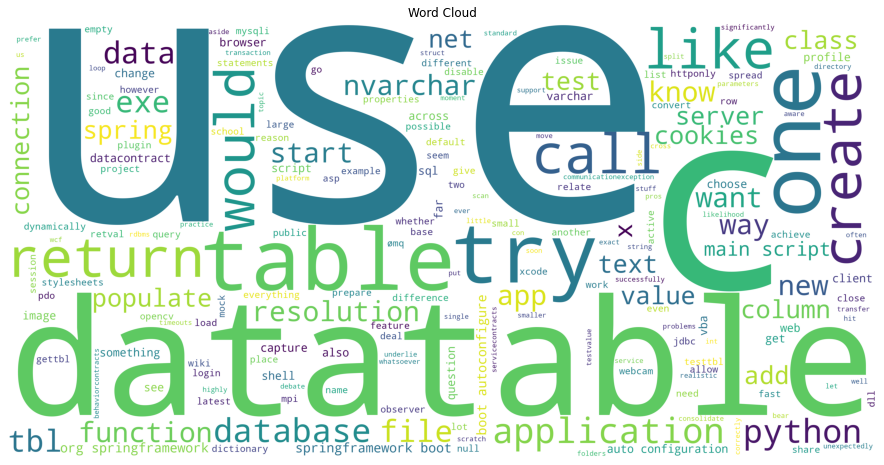

In [28]:
#Word Cloud
clean_test.word_cloud()

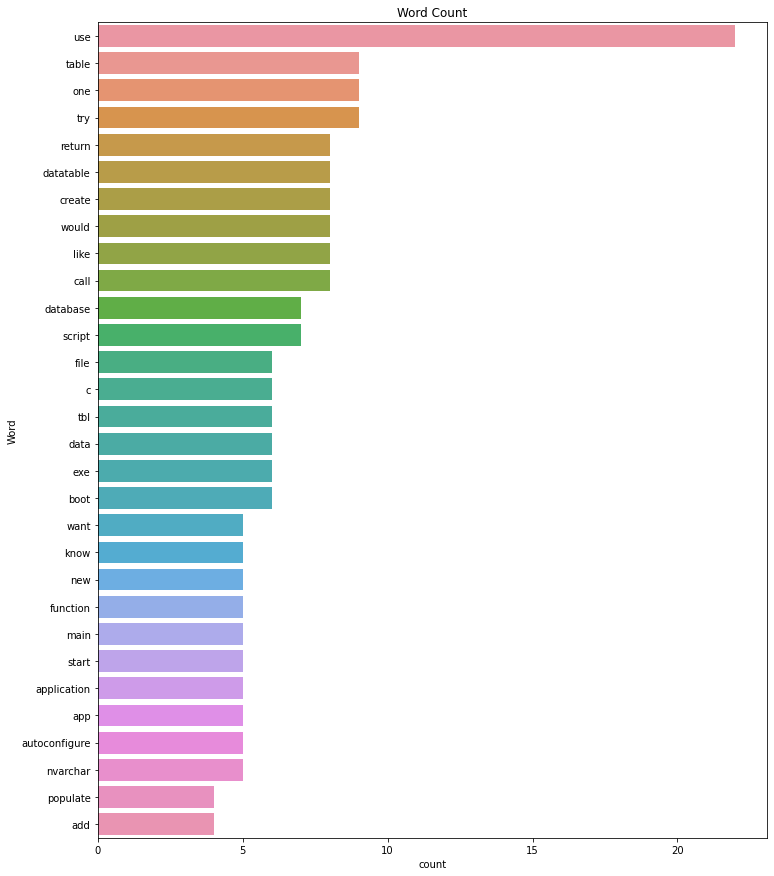

In [29]:
#Word Count
clean_test.word_count()

### 2.2 Analyse, cleansing et sélection de "Tags"<a class="anchor" id="2.2"></a>

In [30]:
display(df["Tags"].head(10))

0    <c><file><directory><cross-platform><common-tasks>          
1    <c#><.net><wcf><web-services><datatable>                    
2    <.net><class><struct><value-type><reference-type>           
3    <php><mysql><pdo><mysqli><database-abstraction>             
4    <asp.net-mvc><unit-testing><mocking><moq><rhino-mocks>      
5    <python><excel><vba><shell><py2exe>                         
6    <.net><windows><plugins><add-in><extensibility>             
7    <c><image><opencv><webcam><resolutions>                     
8    <css><browser><fonts><stylesheet><default>                  
9    <ruby-on-rails><ruby><activerecord><rspec><observer-pattern>
Name: Tags, dtype: object

In [31]:
#Appel de la classe
clean_tags = cleansing(df, 'Tags')

In [32]:
#On commence par passer les tags en minuscule et retirer les stop words
clean_tags.lower_case()
clean_tags.token()

In [33]:
all_words = ' '.join(v for v in df['Tags'])
all_words = all_words.split() 

fdist = nltk.FreqDist(all_words)

In [34]:
len(fdist.keys())

8601

In [35]:
display(fdist)

FreqDist({'android': 4231, 'python': 3917, 'net': 3721, 'java': 3457, 'ios': 3100, 'javascript': 2753, 'c#': 2749, 'c++': 2452, 'c': 2315, 'asp': 1886, ...})

In [36]:
newDict = {key: value for (key, value) in fdist.items() if value < 300 }

In [37]:
len(newDict)

8515

In [38]:
#On liste les tags que nous souhaitons supprimer
list_tags_to_del = list(newDict.keys())
print (list_tags_to_del)

['directory', 'cross', 'platform', 'common', 'tasks', 'wcf', 'datatable', 'class', 'struct', 'value', 'type', 'reference', 'pdo', 'mysqli', 'abstraction', 'mocking', 'moq', 'rhino', 'mocks', 'excel', 'vba', 'shell', 'pyexe', 'plugins', 'add', 'in', 'extensibility', 'opencv', 'webcam', 'resolutions', 'browser', 'fonts', 'stylesheet', 'default', 'activerecord', 'rspec', 'observer', 'pattern', 'sqldatatypes', 'notnull', 'emptydatatext', 'cookies', 'xss', 'httponly', 'templates', 'language', 'agnostic', 'functional', 'programming', 'recursion', 'tail', 'wordpress', 'lamp', 'mediawiki', 'gcc', 'symbols', 'name', 'mangling', 'collections', 'dictionary', 'boot', 'storage', 'varchar', 'nvarchar', 'networking', 'messaging', 'distributed', 'cluster', 'computing', 'version', 'control', 'mercurial', 'comparison', 'dvcs', 'graphics', 'audio', 'photoshop', 'signal', 'terminology', 'definition', 'currying', 'generics', 'features', 'syntax', 'parameter', 'passing', 'variadic', 'functions', 'argument',

In [39]:
#On créé une nouvelle variable contenant les tags restants par observation
df['new_tags'] = [' '.join([y for y in x.split() if y not in list_tags_to_del]) for x in df['Tags']]

In [40]:
df.head(3)

,Title,Body,Tags,Id,token_Tags,new_tags
0,How do you get a directory listing in C?,<p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n,c file directory cross platform common tasks,12489,"[c, file, directory, cross, platform, common, tasks]",c file
1,Returning DataTables in WCF/.NET,"<p>I have a WCF service from which I want to return a DataTable. I know that this is often a highly-debated topic, as far as whether or not returning DataTables is a good practice. Let's put that aside for a moment.</p>\n\n<p>When I create a DataTable from scratch, as below, there are no problems whatsoever. The table is created, populated, and returned to the client, and all is well:</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n for(int i=0;i&lt;100;i++)\n {\n tbl.Columns.Add(i);\n tbl.Rows.Add(new string[]{""testValue""});\n }\n return tbl;\n}\n</code></pre>\n\n<p>However, as soon as I go out and hit the database to create the table, as below, I get a CommunicationException ""The underlying connection was closed: The connection was closed unexpectedly.""</p>\n\n<pre><code>[DataContract]\npublic DataTable GetTbl()\n{\n DataTable tbl = new DataTable(""testTbl"");\n //Populate table with SQL query\n\n return tbl;\n}\n</code></pre>\n\n<p>The table is being populated correctly on the server side. It is significantly smaller than the test table that I looped through and returned, and the query is small and fast - there is no issue here with timeouts or large data transfer. The same exact functions and DataContracts/ServiceContracts/BehaviorContracts are being used.</p>\n\n<p>Why would the way that the table is being populated have any bearing on the table returning successfully?</p>\n",c# net wcf web services datatable,12702,"[c#, net, wcf, web, services, datatable]",c# net web services
2,What's the difference between struct and class in .NET?,<p>What's the difference between struct and class in .NET?</p>\n,net class struct value type reference type,13049,"[net, class, struct, value, type, reference, type]",net


In [41]:
#On supprime les lignes sans tags
df = df[df['new_tags']!='']

df.shape

(25997, 6)

In [42]:
df['count_tags'] = df['new_tags'].str.split().apply(len)

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/935134901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_tags'] = df['new_tags'].str.split().apply(len)


In [43]:
df = df[df['count_tags']<=3]
print(df.shape)

(17849, 7)


C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(text, ' ')
C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/1871374273.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe.loc[:,self.feature] = self.dataframe.loc[:,self.feature].str.replace(num, '')


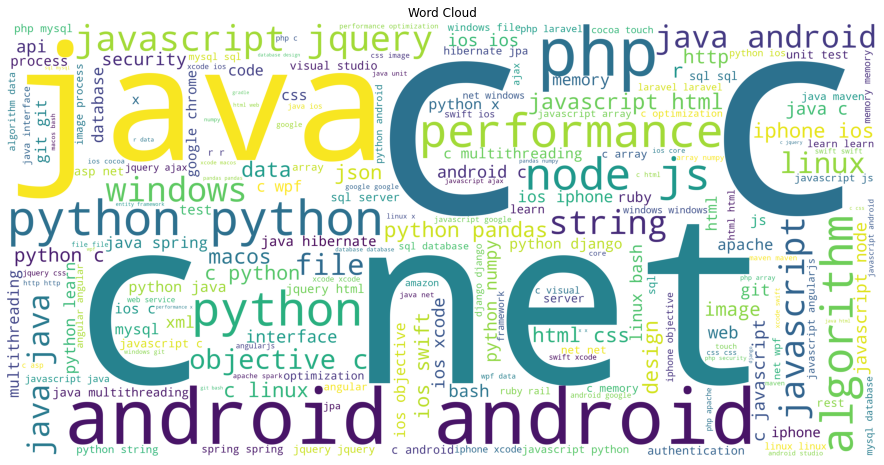

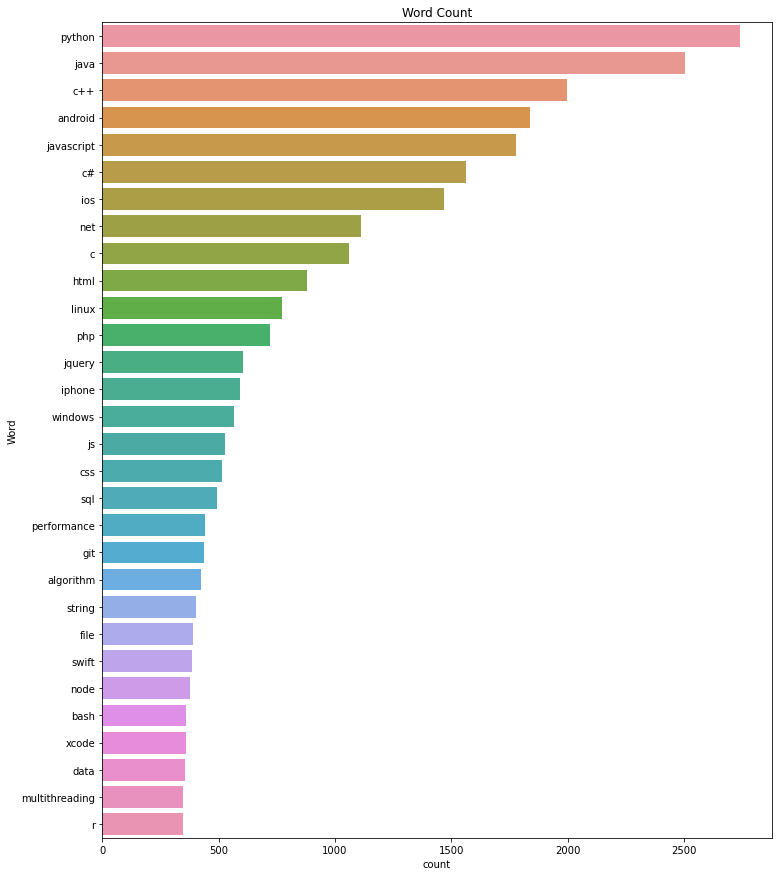

,Title,Body,Tags,Id,token_Tags,new_tags,count_tags,token_new_tags,lem_token_new_tags,stem_lem_token_new_tags
0,How do you get a directory listing in C?,<p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n,c file directory cross platform common tasks,12489,"[c, file, directory, cross, platform, common, tasks]",c file,2,"[c, file]","[c, file]","[c, file]"
2,What's the difference between struct and class in .NET?,<p>What's the difference between struct and class in .NET?</p>\n,net class struct value type reference type,13049,"[net, class, struct, value, type, reference, type]",net,1,[net],[net],[net]
3,mysqli or PDO - what are the pros and cons?,"<p>In our place we're split between using mysqli and PDO for stuff like prepared statements and transaction support. Some projects use one, some the other. There is little realistic likelihood of us ever moving to another RDBMS.</p>\n\n<p>I prefer PDO for the single reason that it allows named parameters for prepared statements, and as far as I am aware mysqli does not.</p>\n\n<p>Are there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach?</p>\n",php mysql pdo mysqli database abstraction,13569,"[php, mysql, pdo, mysqli, database, abstraction]",php mysql database,3,"[php, mysql, database]","[php, mysql, database]","[php, mysql, databas]"
5,How to call python script on excel vba?,"<p>Trying to call a python script on Vba and I am a newb. I tried converting the main script to an exe using py2exe and then calling it from VBA (shell) but the main script calls other scripts therefore it becomes complicated and I messed it up (my exe is not functional). Besides, the the main script is a large file and I do not want to revise it a lot.</p>\n<p>Bottomline, is there a way to call the main script from excel vba, without converting the script to an exe file.</p>\n<p>So far, I tried:</p>\n<pre><code>RetVal = Shell(&quot;C:\python27\python.exe &quot; &amp; &quot;import &quot; &amp; &quot;C:\\&quot; &amp; &quot;MainScriptFile&quot;)\n</code></pre>\n<p>It starts python.exe but does nothing else. Then I tried:</p>\n<pre><code>RetVal = Shell(&quot;C:\Windows\System32\cmd.exe &quot; &amp; &quot;python &quot; &amp; &quot;C:\\Python27\\hello.py&quot;)\n</code></pre>\n<p>It starts command prompt but does not even start python.</p>\n<p>P.S. I checked all the related questions in the forum, they do not solve my prob.</p>\n",python excel vba shell pyexe,18135551,"[python, excel, vba, shell, pyexe]",python,1,[python],[python],[python]
6,How to load plugins in .NET?,"<p>I'd like to provide some way of creating dynamically loadable plugins in my software.\nTypical way to do this is using the <a href=""http://msdn.microsoft.com/en-us/library/ms684175(VS.85).aspx"" rel=""noreferrer"">LoadLibrary</a> WinAPI function to load a dll and calling <a href=""http://msdn.microsoft.com/en-us/library/ms683212(VS.85).aspx"" rel=""noreferrer"">GetProcAddress</a> to get an pointer to a function inside that dll.</p>\n\n<p>My question is how do I dynamically load a plugin in C#/.Net application?</p>\n",net windows plugins add in extensibility,14278,"[net, windows, plugins, add, in, extensibility]",net windows,2,"[net, windows]","[net, windows]","[net, window]"
7,Increasing camera capture resolution in OpenCV,"<p>In my C/C++ program, I'm using <a href=""http://opencvlibrary.sourceforge.net/"" rel=""noreferrer"">OpenCV</a> to capture images from my webcam. The camera (<a href=""http://en.wikipedia.org/wiki/Quickcam"" rel=""noreferrer"">Logitech QuickCam IM</a>) can capture at resolutions <strong>320x240</strong>, <strong>640x480</strong> and <strong>1280x960</strong>. But, for some strange reason, OpenCV gives me images of resolution <strong>320x240</strong> only. Calls to change the resolution using <strong>cvSetCaptureProperty()</strong> with other resolution values just don't work. How do I capture images with the o

In [44]:
clean_tags = cleansing(df, 'new_tags')

clean_tags.token()
clean_tags.rm_stopwords()
clean_tags.lem()
clean_tags.stem()
clean_tags.word_cloud()
clean_tags.word_count()

#Vérification
display(df.head(20))

### 2.3 Analyse et cleansing de "Title"<a class="anchor" id="2.3"></a>

<p>Passons à présent à l'analyse du champs "Title" sur ce jeu de données légèrement réduit après l'analyse des tags. 

In [45]:
display(df["Title"].head(10))

0     How do you get a directory listing in C?                       
2     What's the difference between struct and class in .NET?        
3     mysqli or PDO - what are the pros and cons?                    
5     How to call python script on excel vba?                        
6     How to load plugins in .NET?                                   
7     Increasing camera capture resolution in OpenCV                 
8     Browsers' default CSS stylesheets                              
11    How do you configure HttpOnly cookies in tomcat / java webapps?
13    What is tail recursion?                                        
14    WordPress MediaWiki integration                                
Name: Title, dtype: object

In [46]:
#Appel de la classe
clean_title = cleansing(df, 'Title')

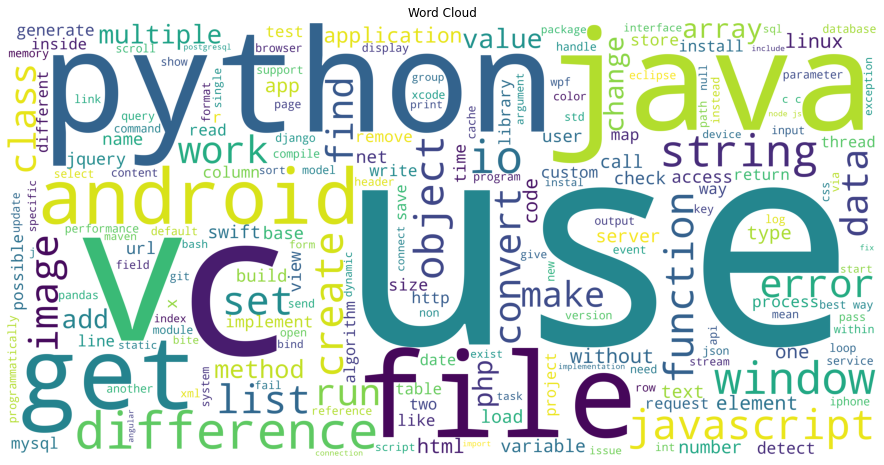

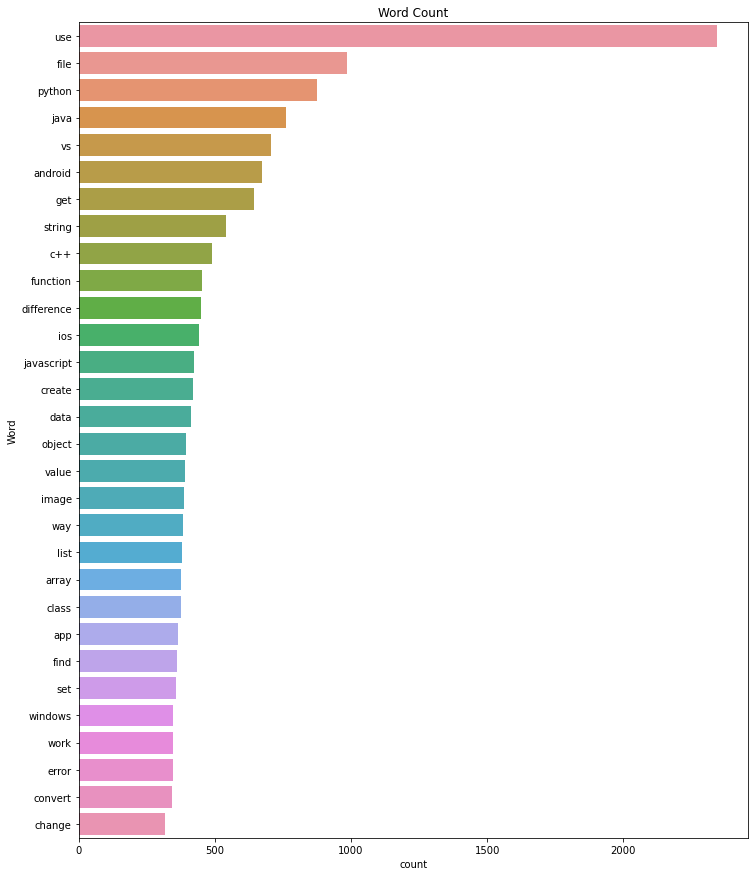

,Title,Body,Tags,Id,token_Tags,new_tags,count_tags,token_new_tags,lem_token_new_tags,stem_lem_token_new_tags,token_Title,lem_token_Title,stem_lem_token_Title
0,how do you get a directory listing in c,<p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n,c file directory cross platform common tasks,12489,"[c, file, directory, cross, platform, common, tasks]",c file,2,"[c, file]","[c, file]","[c, file]","[get, directory, listing, c]","[get, directory, list, c]","[get, directori, list, c]"
2,what s the difference between struct and class in net,<p>What's the difference between struct and class in .NET?</p>\n,net class struct value type reference type,13049,"[net, class, struct, value, type, reference, type]",net,1,[net],[net],[net],"[difference, struct, class, net]","[difference, struct, class, net]","[differ, struct, class, net]"
3,mysqli or pdo what are the pros and cons,"<p>In our place we're split between using mysqli and PDO for stuff like prepared statements and transaction support. Some projects use one, some the other. There is little realistic likelihood of us ever moving to another RDBMS.</p>\n\n<p>I prefer PDO for the single reason that it allows named parameters for prepared statements, and as far as I am aware mysqli does not.</p>\n\n<p>Are there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach?</p>\n",php mysql pdo mysqli database abstraction,13569,"[php, mysql, pdo, mysqli, database, abstraction]",php mysql database,3,"[php, mysql, database]","[php, mysql, database]","[php, mysql, databas]","[mysqli, pdo, pros, cons]","[mysqli, pdo, pros, con]","[mysqli, pdo, pros, con]"
5,how to call python script on excel vba,"<p>Trying to call a python script on Vba and I am a newb. I tried converting the main script to an exe using py2exe and then calling it from VBA (shell) but the main script calls other scripts therefore it becomes complicated and I messed it up (my exe is not functional). Besides, the the main script is a large file and I do not want to revise it a lot.</p>\n<p>Bottomline, is there a way to call the main script from excel vba, without converting the script to an exe file.</p>\n<p>So far, I tried:</p>\n<pre><code>RetVal = Shell(&quot;C:\python27\python.exe &quot; &amp; &quot;import &quot; &amp; &quot;C:\\&quot; &amp; &quot;MainScriptFile&quot;)\n</code></pre>\n<p>It starts python.exe but does nothing else. Then I tried:</p>\n<pre><code>RetVal = Shell(&quot;C:\Windows\System32\cmd.exe &quot; &amp; &quot;python &quot; &amp; &quot;C:\\Python27\\hello.py&quot;)\n</code></pre>\n<p>It starts command prompt but does not even start python.</p>\n<p>P.S. I checked all the related questions in the forum, they do not solve my prob.</p>\n",python excel vba shell pyexe,18135551,"[python, excel, vba, shell, pyexe]",python,1,[python],[python],[python],"[call, python, script, excel, vba]","[call, python, script, excel, vba]","[call, python, script, excel, vba]"
6,how to load plugins in net,"<p>I'd like to provide some way of creating dynamically loadable plugins in my software.\nTypical way to do this is using the <a href=""http://msdn.microsoft.com/en-us/library/ms684175(VS.85).aspx"" rel=""noreferrer"">LoadLibrary</a> WinAPI function to load a dll and calling <a href=""http://msdn.microsoft.com/en-us/library/ms683212(VS.85).aspx"" rel=""noreferrer"">GetProcAddress</a> to get an pointer to a function inside that dll.</p>\n\n<p>My question is how do I dynamically load a plugin in C#/.Net application?</p>\n",net windows plugins add in extensibility,14278,"[net, windows, plugins, add, in, extensibility]",net windows,2,"[net, windows]","[net, windows]","[net, window]","[load, plugins, net]","[load, plugins, net]","[load, plugin, net]"
7,increasing camera capture resolution in opencv,"<p>In my C/C++ program, I'm using <a href=""http://opencvlibrary.sourceforge.net/"" rel=""noreferrer"">OpenCV</a> to capture image

In [47]:
#Lancement des fonctions
clean_title.lower_case()
clean_title.token()
clean_title.rm_stopwords()
clean_title.lem()
clean_title.stem()

clean_title.word_cloud()
clean_title.word_count()

#Vérification
display(df.head(10))

### 2.4 Analyse et cleansing de "Body"<a class="anchor" id="2.4"></a>

In [48]:
display(df["Body"].head(10))

0     <p>How do you scan a directory for folders and files in C? It needs to be cross-platform.</p>\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [49]:
#Appel de la classe
clean_body = cleansing(df, 'Body')

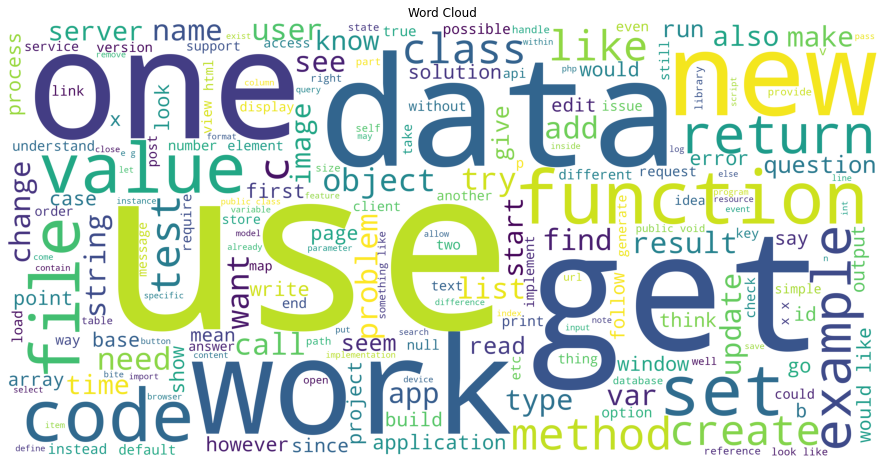

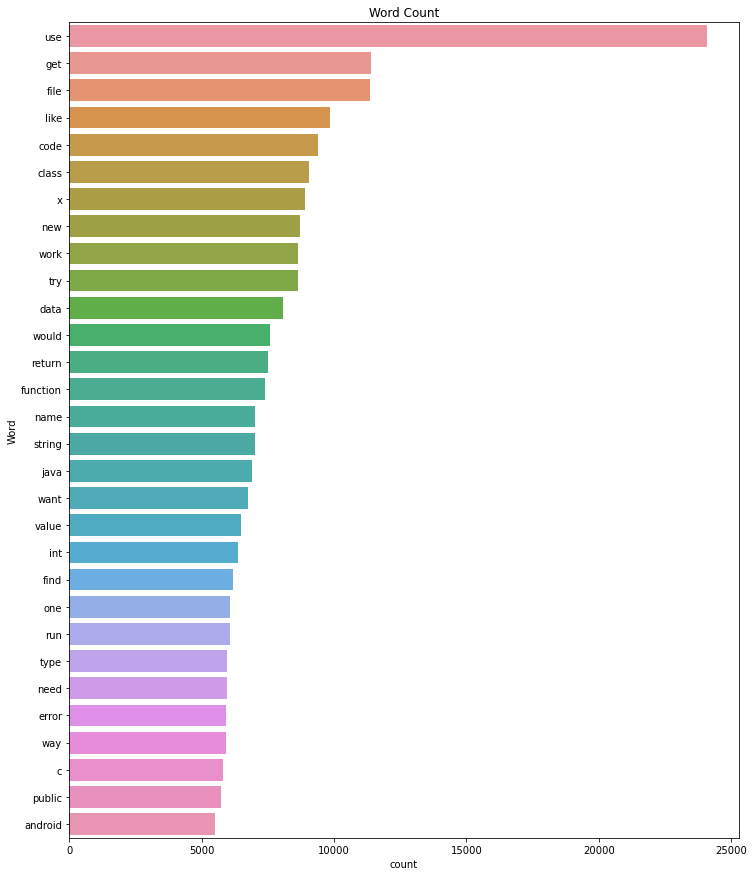

,Title,Body,Tags,Id,token_Tags,new_tags,count_tags,token_new_tags,lem_token_new_tags,stem_lem_token_new_tags,token_Title,lem_token_Title,stem_lem_token_Title,token_Body,lem_token_Body,stem_lem_token_Body
0,how do you get a directory listing in c,how do you scan a directory for folders and files in c it needs to be cross platform,c file directory cross platform common tasks,12489,"[c, file, directory, cross, platform, common, tasks]",c file,2,"[c, file]","[c, file]","[c, file]","[get, directory, listing, c]","[get, directory, list, c]","[get, directori, list, c]","[scan, directory, folders, files, c, needs, cross, platform]","[scan, directory, folders, file, c, need, cross, platform]","[scan, directori, folder, file, c, need, cross, platform]"
2,what s the difference between struct and class in net,what s the difference between struct and class in net,net class struct value type reference type,13049,"[net, class, struct, value, type, reference, type]",net,1,[net],[net],[net],"[difference, struct, class, net]","[difference, struct, class, net]","[differ, struct, class, net]","[difference, struct, class, net]","[difference, struct, class, net]","[differ, struct, class, net]"
3,mysqli or pdo what are the pros and cons,in our place we re split between using mysqli and pdo for stuff like prepared statements and transaction support some projects use one some the other there is little realistic likelihood of us ever moving to another rdbms i prefer pdo for the single reason that it allows named parameters for prepared statements and as far as i am aware mysqli does not are there any other pros and cons to choosing one over the other as a standard as we consolidate our projects to use just one approach,php mysql pdo mysqli database abstraction,13569,"[php, mysql, pdo, mysqli, database, abstraction]",php mysql database,3,"[php, mysql, database]","[php, mysql, database]","[php, mysql, databas]","[mysqli, pdo, pros, cons]","[mysqli, pdo, pros, con]","[mysqli, pdo, pros, con]","[place, split, using, mysqli, pdo, stuff, like, prepared, statements, transaction, support, projects, use, one, little, realistic, likelihood, us, ever, moving, another, rdbms, prefer, pdo, single, reason, allows, named, parameters, prepared, statements, far, aware, mysqli, pros, cons, choosing, one, standard, consolidate, projects, use, one, approach]","[place, split, use, mysqli, pdo, stuff, like, prepare, statements, transaction, support, project, use, one, little, realistic, likelihood, us, ever, move, another, rdbms, prefer, pdo, single, reason, allow, name, parameters, prepare, statements, far, aware, mysqli, pros, con, choose, one, standard, consolidate, project, use, one, approach]","[place, split, use, mysqli, pdo, stuff, like, prepar, statement, transact, support, project, use, one, littl, realist, likelihood, us, ever, move, anoth, rdbms, prefer, pdo, singl, reason, allow, name, paramet, prepar, statement, far, awar, mysqli, pros, con, choos, one, standard, consolid, project, use, one, approach]"
5,how to call python script on excel vba,trying to call a python script on vba and i am a newb i tried converting the main script to an exe using pyexe and then calling it from vba shell but the main script calls other scripts therefore it becomes complicated and i messed it up my exe is not functional besides the the main script is a large file and i do not want to revise it a lot bottomline is there a way to call the main script from excel vba without converting the script to an exe file so far i tried retval shell c \python\python exe & import & c \\ & mainscriptfile it starts python exe but does nothing else then i tried retval shell c \windows\system\cmd exe & python & c \\python\\hello py it starts command prompt but does not even start python p s i checked all the related questions in the forum they do not solve my prob,python excel vba shell pyexe,18135551,"[python, excel, vba, shell, pyexe]",python,1,[python],[python],[python],"[call, python, script, exc

In [50]:
#Lancement des fonctions
clean_body.html_parse()
clean_body.lower_case()
clean_body.token()
clean_body.rm_stopwords()
clean_body.lem()
clean_body.stem()
clean_body.word_cloud()
clean_body.word_count()

#Vérification
display(df.head(10))

### 2.5 Suppression des mots peu fréquents<a class="anchor" id="2.5"></a>

In [51]:
#Fusion du titre et du body
df['Title_Body'] = df['lem_token_Title']+df['lem_token_Body']

In [52]:
corpus = ' '.join(str(v) for v in df['Title_Body'])

char = ["'", "[", "]",","]
for text in char:
    corpus = corpus.replace(text, '')
    
all_words = corpus.split()
dictionary = {}
for word in all_words:
    if word in dictionary:
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [53]:
dictionary_sort = {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=False)}

In [54]:
words_to_keep = [k for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True) if v > 2]

In [55]:
len(words_to_keep)

29736

In [56]:
df['Title_Body'] = df['Title_Body'].apply(lambda x: [item for item in x if item in words_to_keep])

## Export des datas<a class="anchor" id="3"></a>

In [57]:
#Extraction des colonnes à exporter
df_export = df[['Title_Body','lem_token_new_tags']]
df_export.rename(columns={"lem_token_new_tags": "Tags"},inplace=True)

C:\Users\mejdi\AppData\Local\Temp/ipykernel_25464/4226504952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export.rename(columns={"lem_token_new_tags": "Tags"},inplace=True)


In [58]:
df_export.head()

,Title_Body,Tags
0,"[get, directory, list, c, scan, directory, folders, file, c, need, cross, platform]","[c, file]"
2,"[difference, struct, class, net, difference, struct, class, net]",[net]
3,"[mysqli, pdo, pros, con, place, split, use, mysqli, pdo, stuff, like, prepare, statements, transaction, support, project, use, one, little, realistic, likelihood, us, ever, move, another, rdbms, prefer, pdo, single, reason, allow, name, parameters, prepare, statements, far, aware, mysqli, pros, con, choose, one, standard, consolidate, project, use, one, approach]","[php, mysql, database]"
5,"[call, python, script, excel, vba, try, call, python, script, vba, try, convert, main, script, exe, use, pyexe, call, vba, shell, main, script, call, script, therefore, become, complicate, mess, exe, functional, besides, main, script, large, file, want, revise, lot, way, call, main, script, excel, vba, without, convert, script, exe, file, far, try, retval, shell, c, exe, &, import, &, c, \\, &, start, python, exe, nothing, else, try, retval, shell, c, exe, &, python, &, c, py, start, command, prompt, even, start, python, p, check, relate, question, forum, solve, prob]",[python]
6,"[load, plugins, net, like, provide, way, create, dynamically, plugins, software, typical, way, use, loadlibrary, winapi, function, load, dll, call, getprocaddress, get, pointer, function, inside, dll, question, dynamically, load, plugin, c#, net, application]","[net, windows]"


In [59]:
#export du fichier
df_export.to_csv('export.csv', index=False)

## Analyse univariée
###### Analyse et gestion des tags

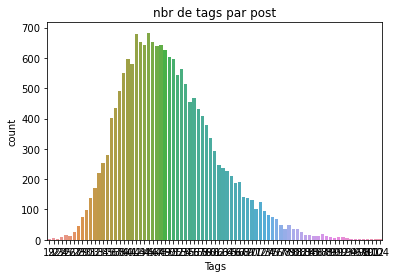

In [60]:
sns.countplot(df.Tags.map(lambda field:len(field)))
plt.title("nbr de tags par post")
plt.show()

In [61]:
all_tags=[]
for i in df.Tags:
    for j in i:
        all_tags.append(j)

Text(0.5, 1.0, 'Les 20 Tags les plus présent')

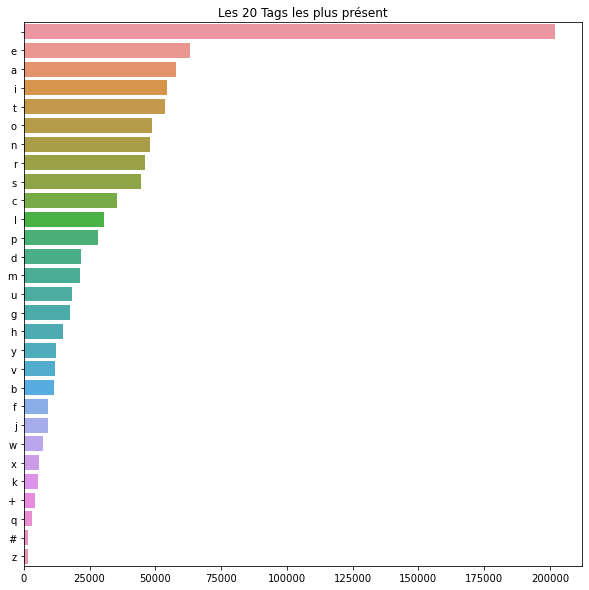

In [68]:
#Affichage des 20 Tags les plus présent
import collections
counter=collections.Counter(all_tags)
common = counter.most_common(70)
labels = [item[0] for item in common]
number = [item[1] for item in common]

plt.figure(figsize=(10,10))
sns.barplot(number, labels)
plt.title("Les 20 Tags les plus présent")

In [69]:
#liste=[]
#for i in range(0,len(labels)):
   # if number[i]>500:
     #   liste.append(labels[i])    

### Analyse du texte

In [70]:
df["Document"] = (df.Title + df.Body)
df=df.drop(["Title", "Body"], axis=1)

In [71]:
all_words=[]
for i in df.Document:
    for j in i:
        all_words.append(j)

C:\Users\mejdi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mejdi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


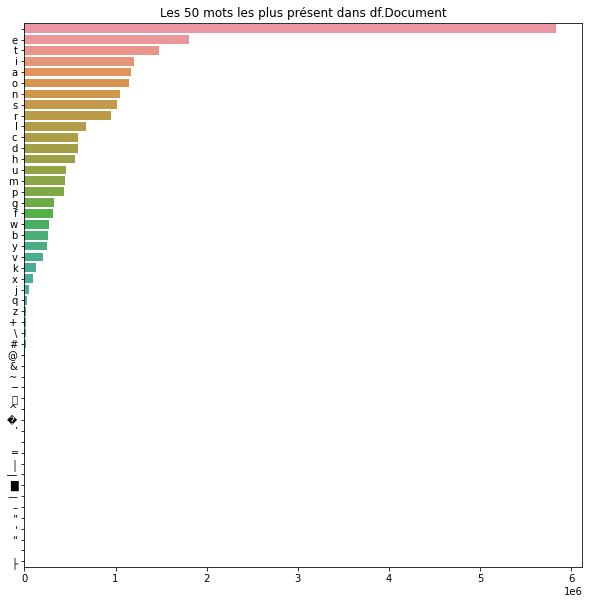

In [72]:
#Affichage des 50 mots les plus présent dans df.Document
counter=collections.Counter(all_words)
common = counter.most_common(50)
labels = [item[0] for item in common]
number = [item[1] for item in common]

plt.figure(figsize=(10,10))
sns.barplot(number, labels)
plt.title("Les 50 mots les plus présent dans df.Document")
plt.show()